# Regression

In [2]:
import numpy as np
import pandas as pd

sales_df = pd.read_csv('../resources/advertising_and_sales_clean.csv')
sales_df = sales_df.drop('influencer', axis=1)
print(sales_df.head())

        tv     radio  social_media      sales
0  16000.0   6566.23       2907.98   54732.76
1  13000.0   9237.76       2409.57   46677.90
2  41000.0  15886.45       2913.41  150177.83
3  83000.0  30020.03       6922.30  298246.34
4  15000.0   8437.41       1406.00   56594.18


- advertising expenditure as features to predict sales values

In [3]:
# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


  - feature and target arrays were created
  - train linear regression model on all feature and target values
  Goal: assess relationship between feature and target values

In [7]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


## Visualizing a linear regression model

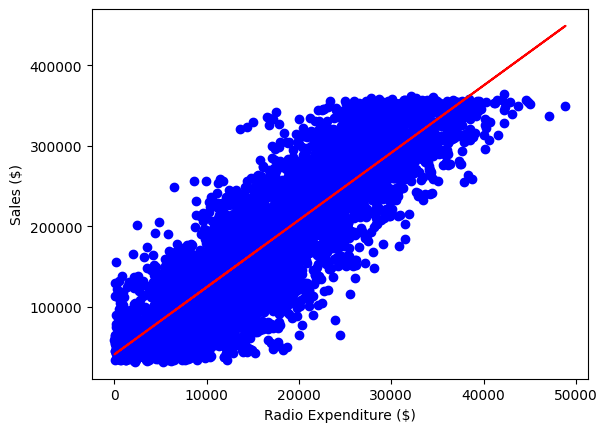

In [8]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## Regression Mechanics
- y = ax + b
- Simple linear regression uses one feature
    - y = target
    - x = single feature
    - a, b = parameters/coefficients of the model - slope, intercept

### Linear regression in higher dimensions
y = a1x1 + a2x2 + b

- To fit a linear regression model here:
    - Need to specify 3 variables: a1, a2, b
- In higher dimensions:
    - Known as multiple regression
    - Must specify coefficents for each feature and the variable b
        y = a1x1 + a2x2 + ... + anxn + b

#### R-suared
- Quantifies the variance in target values. Explained by the features:
- Values range from 0 to 1

#### Mean Squared Error and Root Mean Squared Error
- MSE is measured in target units, squared
- RMSE in the same units as the target variable

In [22]:
from  sklearn.model_selection import train_test_split
# Fit and predict for regression
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [39]:
# Regression performance
# Find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data

# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))


R^2: 0.9990152104759368
RMSE: 2944.433199600125


/Users/carlrix/Documents/Projects/machine-learning-fundamentals-in-python/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Cross-validation
- Motivation:
    - Model performance is dependent on the way data is split up
    - Not representative of models ability to generalize unseen data
    - maximizes amount of data available to model
        - is trained and tested on all available data

Cross-validation by splitting into folds:
- i.e. 5-fold CV


In [40]:
# Cross validation for R-squared
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [41]:
# Analyzing cross-validation metrics
cv_results = np.array([0.74451678, 0.77241887, 0.76842114, 0.7410406, 0.75170022, 0.74406484])
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.7536937416666666
0.012305386274436092
[0.74141863 0.77191915]


## Regularized Regression
- Linear regression minimizes a loss function
- It chooses a coefficient, a, for each feature variable, plus b
- Large coefficients can lead to overfitting
- Regularization: Penalises large coefficients

### Ridge Regression
- Loss function = OLS loss function = ...
- Ridge penalizes large positive of negative coefficients
- ⍺: parameter we need to choose
- Picking ⍺ is similar to picking k in KNN
- Hyperparameter: variable used to optimize model parameters
- ⍺ controls model complexity
    - ⍺ = 0 = OLS (Can lead to overfitting)
    - Very high ⍺: Can Lead to underfitting

### Lasso Regression
- Loss function = OLS loss function + absolute value of each coefficient multiplied by ⍺
- Lasso can select important features of a dataset
- Shrinks the coefficients of less important features to zero
- Features not shrunk to zero are selected by lasso


In [42]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:

  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)

  # Fit the data
  ridge.fit(X_train, y_train)

  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)


[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


[ 3.56256962 -0.00397035  0.00496385]


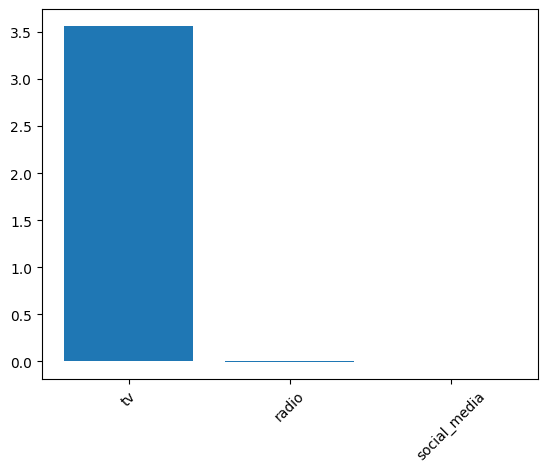

In [68]:
sales_columns = (['tv', 'radio', 'social_media'])
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()